In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from numpy import mean, sqrt
from scipy.stats import norm as ndist

from code.probability import BoxModel, Binomial, RandomVariable, SumIntegerRV
from code import roulette
from code.week1 import standardize_right, standardize_left, normal_curve
from code.utils import probability_histogram
figsize = (8,8)
plot_opts = {'alpha':0.5, 'facecolor':'gray'}


/Users/jonathantaylor/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


# Hypothesis tests

- So far, we have talked about **hypotheses**: questions about the data generating mechanism. 

- Formally, this requires specifying a **null hypothesis** and its complement the **alternative hypothesis.**

- Assuming the null is true, we have found ways to recreate many data sets
that have similar properties to the observed data (as similar as possible).

- These **resampling schemes** allow us to weigh the evidence for or against the null hypothesis
based on a **test statistic**.


## What if we can't resample?

- In some scenarios, constructing a plausible way to regenerate many data sets
is implausible.

### What to do? 

- We need some **reference distribution** for our test statistic.





## Probability histogram  

- Our earlier resampling methods were really ways to use the computer
to form this **reference distribution**.

- In our tea example, we could compute the reference distribution exactly. Other
examples we just used the computer to make many draws.

- If we let the computer run *forever* we could compute this reference distribution exactly
as in the tea example. 

- The resulting histogram is sometimes called a **probability histogram**.

## Normal approximation

- In some sense, our resampling schemes work because as we collect more data, the reference distribution
created by our resampling schemes takes on a familiar shape.

- This shape is the (in)famous **normal curve**.

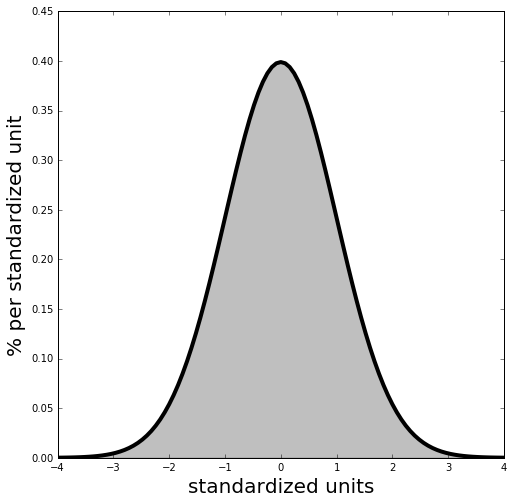

In [2]:
normal_fig = plt.figure(figsize=(8,8))
normal_curve();

## Probability histogram for tossing a fair coin

- When tossing a fair coin, there is 1/2 probability of getting 1 head, 1/2 of getting 0 heads.
- We can make a histogram with an rectangle of width 1, area 1/2 around 0, and an identical rectangle around 1.

In [3]:
coin_trial = BoxModel(['H','T'])
coin_trial.mass_function

{'H': 0.5, 'T': 0.5}

### Probability histogram of successes

(-0.6, 1.6)

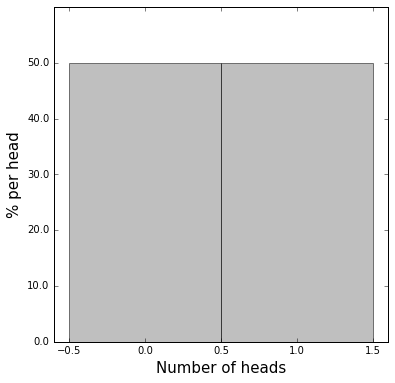

In [4]:
one_toss = plt.figure(figsize=(6,6))
one_toss_ax = probability_histogram(Binomial(1, coin_trial, ['H']),
                                    draw_bins=np.arange(2)-0.5,
                                    xlabel='Number of heads',
                                    ylabel='% per head', **plot_opts)[0]
one_toss_ax.set_xlim([-0.6,1.6])

## Difference between probability histogram and mass function

- The `mass_function` tells us the exact chances of either 0 or 1 success
in our trial.

- The probability histogram is based on breaking the numbers into bins (like
we did with sample data earlier). 

- It then finds all the `mass` in those bins.

- In our example, we have two bins: [-0.5,0.5) and [0.5,1.5).

- There is chances 1/2 for the successes to be in the first bin, and 
chances 1/2 in the second.

- Just as in a histogram for data, areas of bars represents percentages (chances).


## Tossing a fair coin twice

* When tossing a fair coin twice , there is
*     * 1/4 probability of getting 2 heads
      * 1/2 probability of getting 1 head
      * 1/4 probability of getting 0 heads
* We can make similarly make a histogram for this experiment.
* This histogram is called a *probability histogram*.


### Probability histogram of successes

In [5]:
def fair_coin_histograms(ntoss, ndraws=None):
    toss_fig = plt.figure(figsize=figsize)
    toss_ax = probability_histogram(Binomial(ntoss, coin_trial, ['H']),
                                    bins=np.arange(ntoss+2)-0.5,
                                    xlabel='Number of heads',
                                    ylabel='% per head',
                                    ndraws=ndraws,
                                    **plot_opts)[0]
    toss_ax.set_xlim([-0.6,ntoss + .6])
    toss_ax.legend()
    return toss_fig

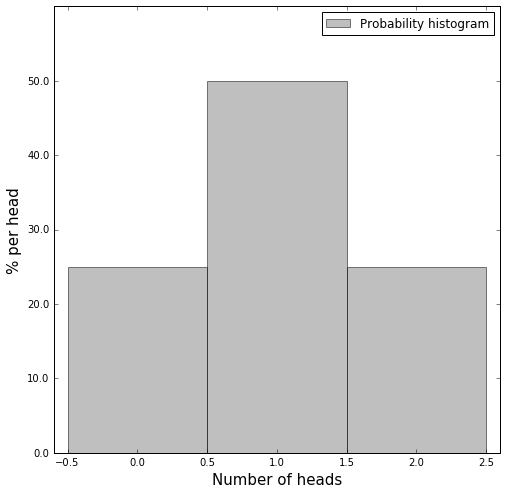

In [6]:
fair_coin_histograms(2);

Let's compare this with
the actual number of successes if we toss a fair coin many times.

In [7]:
two_draws = Binomial(2, BoxModel(['H','T']), ['H'])
two_draws.mass_function

{0: 0.25, 1: 0.5, 2: 0.25}

In [8]:
two_draws.sample(10)

[1, 1, 2, 2, 0, 1, 0, 0, 2, 1]

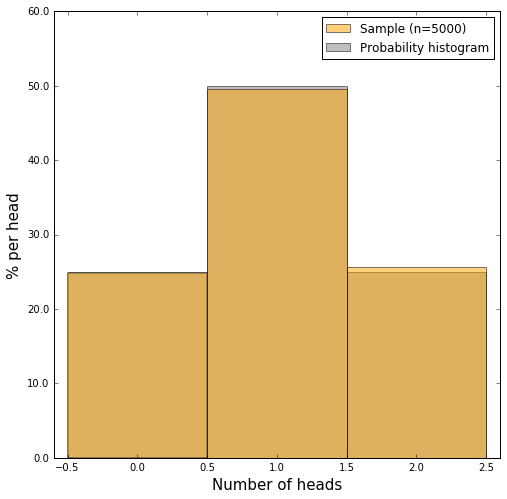

In [40]:
fair_coin_histograms(2, ndraws=5000);


## Increasing the number of draws

- The sample histogram looks close to the probability histogram.

- As we take a larger sample, the closer it gets.

- This effectively justifies resampling methods like the permutation and bootstrap tests we saw.

## Probability histogram: law of large numbers

* Choose an experiment (e.g. tossing a fair coin twice and counting the number of heads, $H$).
* Repeat the experiment 500 times creating a list $[H_1, H_2, \dots, H_{500}].$
* The frequentist view of probability tells us that the histogram of the list $[H_1, H_2, \dots, H_{500}]$ should look like the *probability histogram*.
* Or, the empirical histogram *converges* to the probability histogram.
* We call this the [*Law of Large Numbers*](https://en.wikipedia.org/wiki/Law_of_large_numbers).
  

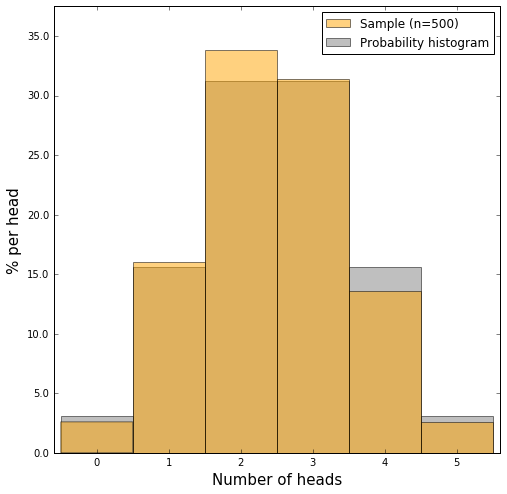

In [10]:
fair_coin_histograms(5, ndraws=500);

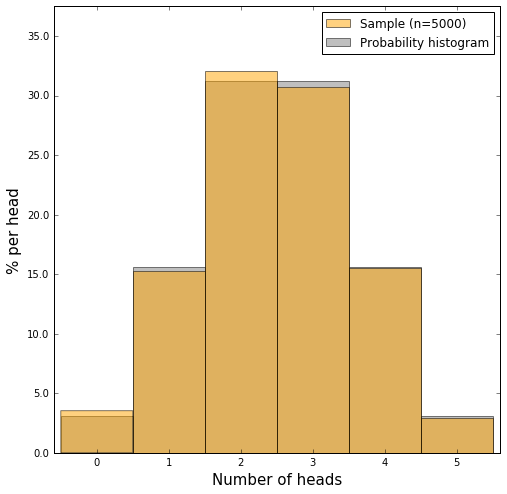

In [11]:
fair_coin_histograms(5, ndraws=5000);

## Tossing the coin more times

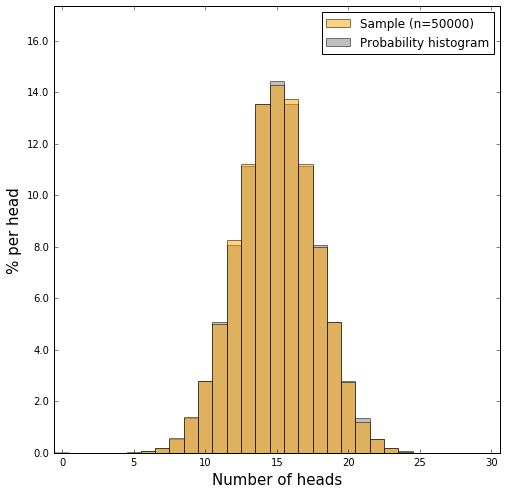

In [12]:
toss_30_fig = fair_coin_histograms(30, ndraws=50000)
toss_30_ax = toss_30_fig.gca()

## Enter the normal curve

- The probability histogram looks a lot like a normal curve!

- **This is not an accident!**

- This is a result of the [*Central Limit Theorem*](https://en.wikipedia.org/wiki/Central_limit_theorem) or the *Law of Averages*.

- The probability histogram of tossing a fair coin 15 times looks a lot like a normal curve with
an average of 30 and a standard deviation of $\sqrt{30 / 4}$.

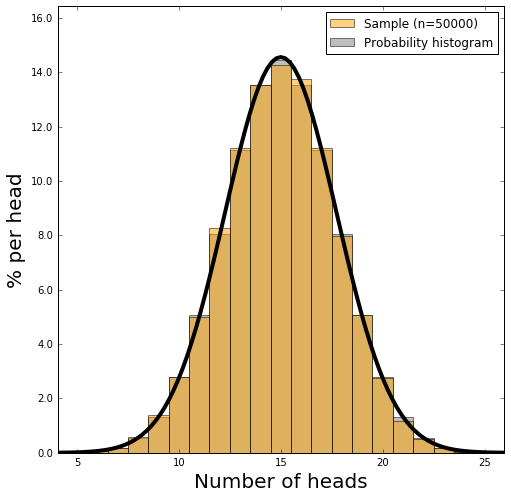

In [13]:
normal_curve(mean=15, SD=np.sqrt(30/4.), ax=toss_30_ax, alpha=0.)
toss_30_ax.set_xlabel('Number of heads')
toss_30_ax.set_ylabel('% per head')
toss_30_fig

## Use of the normal curve

- Using the normal curve is not always defensible.

- We need to know enough about the data generating mechanism (under the null hypothesis) to:
    1. Establish that the sampling distribution looks like the normal curve.
    2. Compute the center and scale of the normal curve for the null distribution.
    
- Often, point 1. can take quite a lot of math!

- When possible, a resampling mechanism like the bootstrap or permutation test can
effectively do all the work for point 2. above.

## Roulette

- Let's look at another game of chance: [roulette](https://en.wikipedia.org/wiki/Roulette).

- The numbers [2,24,29] are my lucky numbers.

- I think I will try betting on them!

In [14]:
roulette.examples['lucky numbers']

### Probability histogram of successes

In [15]:
def roulette_histograms(nbet, bet, ndraws=None):
    single_bet = BoxModel(['0', '00'] + [str(i) for i in range(1,37)])
    model = Binomial(nbet, single_bet, [str(b) for b in bet])
    roulette_fig = plt.figure(figsize=figsize)
    roulette_ax = probability_histogram(model,
                                        bins=np.arange(nbet+2)-0.5,
                                        xlabel='Number of successes',
                                        ylabel='% per success',
                                        ndraws=ndraws,
                                       **plot_opts)[0]
    roulette_ax.set_xlim([-0.6, nbet + .6])
    roulette_ax.legend()
    return roulette_fig

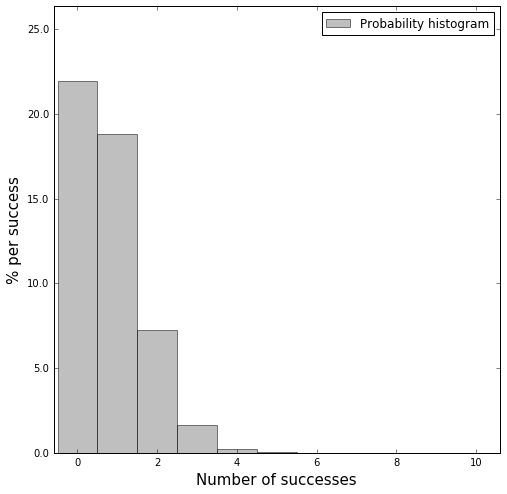

In [16]:
roulette_histograms(10, [2,24,29]);

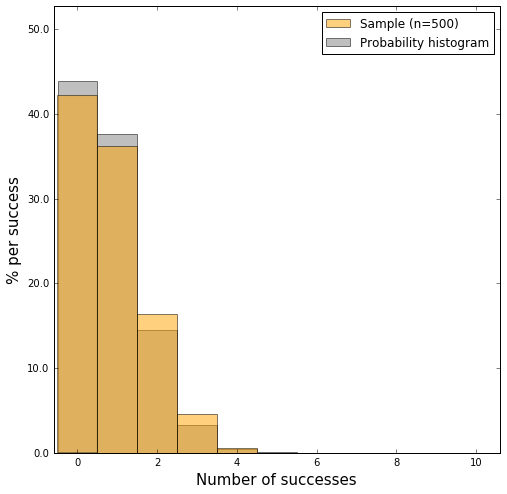

In [17]:
roulette_histograms(10, [2,24,29], ndraws=500);

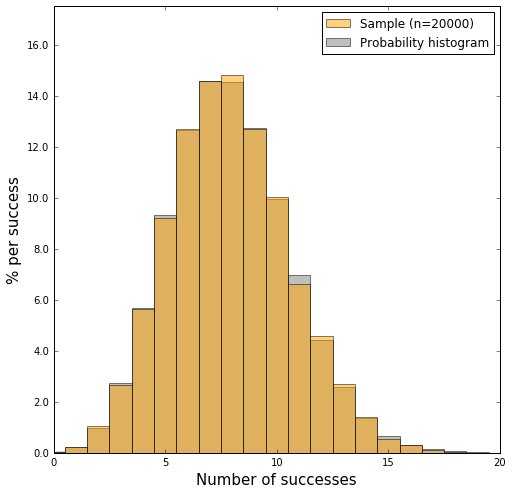

In [60]:
roulette_fig = roulette_histograms(100, [2,24,29], ndraws=20000)
roulette_ax = roulette_fig.gca()
roulette_ax.set_xlim([0,20]);


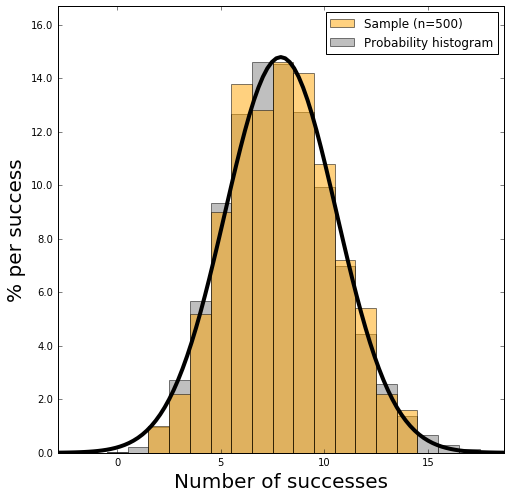

In [19]:
normal_curve(mean=100 * 3/38., 
             SD=np.sqrt(100 * 3/ 38. * 35 / 38.), 
             ax=roulette_ax,
             alpha=0.)
roulette_ax.set_xlabel('Number of successes')
roulette_ax.set_ylabel('% per success')
roulette_fig

## What we learned about betting on [2,24,29]

- After 10 bets, the histograms (both the probability and the sample one) don't look like the normal curve.

- After 100 bets, the histograms start to look like the normal curve.



# Betting money in roulette

- Suppose we start with 100\$ and use my lucky numbers bet.

- Each bet I make is 10$. 

- For a winning bet, my total is 110$ more than just before the bet.

- For a losing bet, my total is 10$ less than just before the bet.

- In this case, the outcome is now \$ (and we'll eventually lose to the casino...)

In [20]:
def winnings_histogram(nbet, initial, bet, bet_amount, ndraws=None):
    winnings_fig = plt.figure(figsize=figsize)
    single_roll = BoxModel(['0', '00'] + [str(i) for i in range(1,37)])
    single_bet = single_roll.event([str(b) for b in bet])
    successes = Binomial(nbet, single_bet)    
    winning_amount = (36. / len(bet) - 1) * bet_amount
    winnings = RandomVariable(successes, lambda wins : initial + winning_amount * wins - bet_amount * (nbet - wins) )
    probability_histogram(winnings, width= 36. / len(bet) * bet_amount, facecolor='gray',
                          xlabel='Total (\$)', ylabel='% per \$')
    winnings_ax = winnings_fig.gca()
    winnings_ax.set_title('After %d bets of %0.2f\$' % (nbet, bet_amount), fontsize=15)
    
    return winnings_fig, winnings


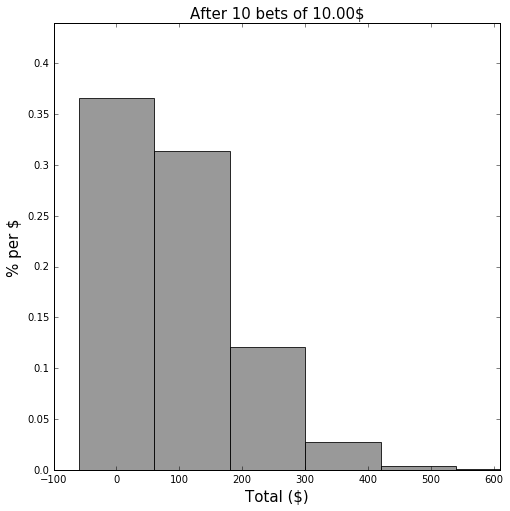

In [21]:
winnings_fig, winnings = winnings_histogram(10, 100, [2,24,29], 10)
winnings_ax = winnings_fig.gca()
winnings_ax.set_xlim([-100,610]);

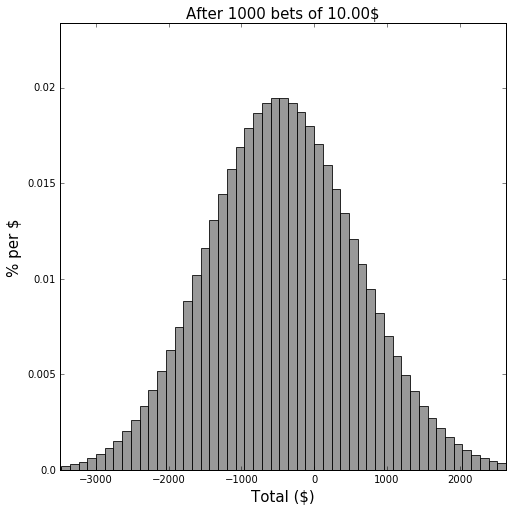

In [22]:
winnings_histogram(1000, 100, [2,24,29], 10);

## Normal approximation

### Central limit theorem

* When making many independent draws from a box, the central limit theorem says that we can use the normal curve to approximate probabilities of things for the **sum of draws**
  .
* Specifically, the standard normal curve applies to 
$$\frac{\text{ sum of draws} - \text{expected( sum of draws)}}{\text{SE( sum of draws)}}$$

### Example

- In roulette, betting on  `[5]` 100 times, 10\$ each bet starting with 100\$. 
   
- What are the chances we will finish with more than 200 \$?

- Here is the box we draw from:

In [23]:
places = {}
for i in range(1,37) + ['0','00']:
    if i in [5]:
        places[i] = roulette.roulette_position(350,
                                               facecolor='green',
                                               bg_alpha=None,
                                               fontsize=90)
    else:
        places[i] = roulette.roulette_position(-10,
                                               facecolor='red',
                                               bg_alpha=None,
                                               fontsize=90)
winnings = roulette.roulette_table(places)
from IPython.core.display import HTML

In [24]:
HTML(winnings)

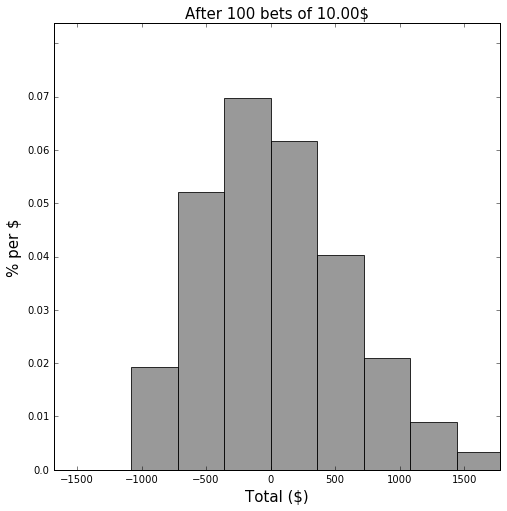

In [52]:
winnings_rv = winnings_histogram(100, 100, [5], 10, ndraws=100)[1];

We could compute:
- `average(sum of 100 draws) = 100 * (-0.52)$ = -52$`
- `SE(sum of  100 draws) = 576$`
- Finishing with more than 200\$ means the **sum of draws** was greater than 100\$ .
- In standardized units, this is $$\frac{100-(-52)}{576} \approx 0.27$$

In [61]:
(1 / 38. * 350 + 37 / 38. * (-10)) * 100

-52.631578947368496

In [65]:
average_winnings = np.mean(winnings_rv.sample(100000)) - 100
sd_winnings = np.std(winnings_rv.sample(100000))
standardized_200 = (100 - average_winnings) / sd_winnings
average_winnings, sd_winnings, standardized_200

(-53.390799999999999, 574.25828065859002, 0.2671111678600146)

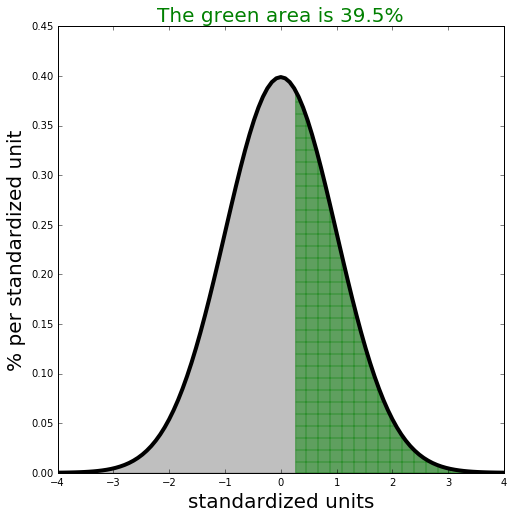

In [66]:
normal_fig = plt.figure(figsize=figsize)
ax = normal_curve()

interval = np.linspace(standardized_200, 4, 101)
ax.fill_between(interval, 0*interval, ndist.pdf(interval),
                hatch='+', color='green', alpha=0.5)
ax.set_title('The green area is %0.1f%%' % (100 * ndist.sf(standardized_200)), fontsize=20, color='green');


In [29]:
np.mean(np.array(winnings_rv.sample(5000)) > 200.)

0.2752

## Central limit theorem

* The central limit theorem applies to **sum of draws**.

* The number of draws should be reasonably large.

* The more lopsided the values are, the more draws needed for reasonable approximation 
    - Compare the approximations of rolling  5 in roulette to flipping a fair coin.

* It is a type *convergence* that is different to the *Law of Large Numbers*.

* As the number of draws grows, the normal approximation gets better.

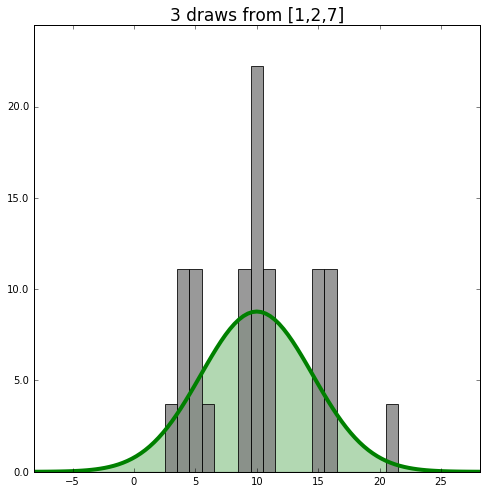

In [30]:
def lopsided_random_variable(ndraw):
    mass = np.array([0,1,1,0,0,0,0,1])/3.
    rv = SumIntegerRV(mass, ndraw)
    fig = plt.figure(figsize=(8,8))
    ax, avg, sd = probability_histogram(rv,
                                        facecolor='gray')
    normal_curve(mean=avg, SD=sd, ax=ax, alpha=0.3, facecolor='green', color='green',
                 xlabel=None, ylabel=None)
    ax.set_ylim([0,1.1*max(rv.mass_function.values())])
    ax.set_title('%d draws from [1,2,7]' % ndraw, fontsize=17)
    
lopsided_random_variable(3)

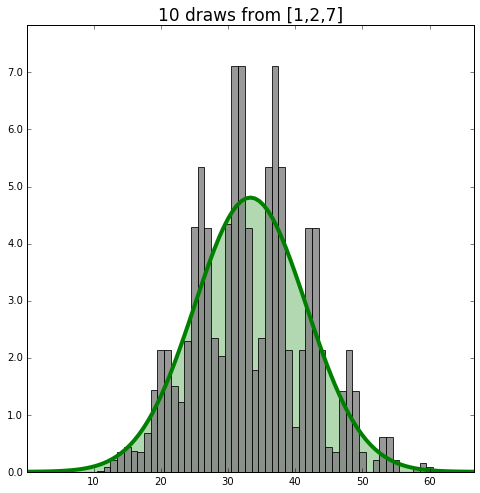

In [31]:
lopsided_random_variable(10)

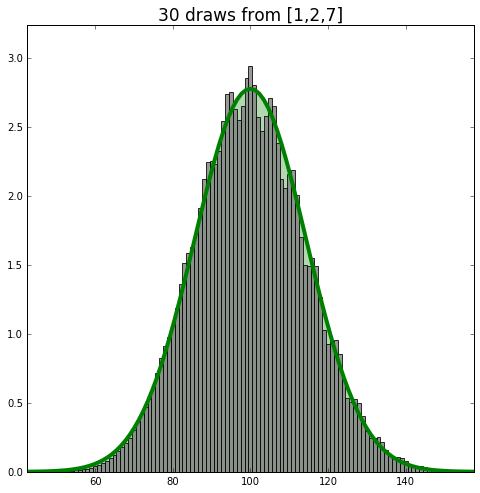

In [32]:
lopsided_random_variable(30)

## Take away 

- If the box is lopsided, convergence to normal curve may be slower.

- But it still happens (and can be used)!

- Normal approximations can be used when a resampling method is unavailable.

- Normal approximations require some calculations: we must find the center and spread for the normal curve.

- If a resampling method is available:
    - It is often easier. 
    - It is often better than the normal approximation.

## How many samples are enough?

- The normal approximation works when we take enough
samples from the box.
- But how many should we take?
- There have been various rules proposed...
- For counts, a [rule of thumb](http://en.wikipedia.org/wiki/Binomial_distribution#Normal_approximation) says the Normal approximation to the Binomial is OK when $np \geq k$ and $n(1-p) \geq k$
where $k$ is of the order of 5 or 10.
